### Stacked LSTM RNN Model for Prediction and Forecasting of Stock Price

In [72]:
import numpy as np       # Importing libraries
import pandas as pd

In [73]:
df=pd.read_csv('AAPL.csv')    # Reading the data

In [74]:
df.head(25) # First 25 Datapoints

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.340,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.860,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.230,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.200,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.860,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.9000,130.660,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.9100,129.580,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.3600,129.500,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.8300,128.900,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.6200,126.700,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [75]:
df.tail(25)  # Last 25 Datapoints

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1233,1233,AAPL,2020-04-20 00:00:00+00:00,276.93,281.680,276.8500,277.95,32503750,276.199713,280.937187,276.119924,277.217024,32503750,0.00,1.0
1234,1234,AAPL,2020-04-21 00:00:00+00:00,268.37,277.250,265.4300,276.28,45247893,267.662287,276.518870,264.730040,275.551428,45247893,0.00,1.0
1235,1235,AAPL,2020-04-22 00:00:00+00:00,276.10,277.900,272.2000,273.61,29264342,275.371902,277.167155,271.482187,272.888469,29264342,0.00,1.0
1236,1236,AAPL,2020-04-23 00:00:00+00:00,275.03,281.750,274.8700,275.87,31203582,274.304724,281.007003,274.145146,275.142509,31203582,0.00,1.0
1237,1237,AAPL,2020-04-24 00:00:00+00:00,282.97,283.010,277.0000,277.20,31627183,282.223785,282.263680,276.269529,276.469001,31627183,0.00,1.0
1238,1238,AAPL,2020-04-27 00:00:00+00:00,283.17,284.540,279.9500,281.80,29271893,282.423258,283.789645,279.211749,281.056871,29271893,0.00,1.0
1239,1239,AAPL,2020-04-28 00:00:00+00:00,278.58,285.830,278.2000,285.08,28001187,277.845362,285.076243,277.466364,284.328221,28001187,0.00,1.0
1240,1240,AAPL,2020-04-29 00:00:00+00:00,287.73,289.670,283.8900,284.73,34320204,286.971233,288.906117,283.141359,283.979144,34320204,0.00,1.0
1241,1241,AAPL,2020-04-30 00:00:00+00:00,293.80,294.530,288.3500,289.96,45765968,293.025226,293.753301,287.589598,289.195352,45765968,0.00,1.0
1242,1242,AAPL,2020-05-01 00:00:00+00:00,289.07,299.000,285.8500,286.25,60154175,288.307699,298.211513,285.096191,285.495136,60154175,0.00,1.0


In [76]:
df1=df.reset_index()['close']   # Extracting Closing Prices for further analysis

In [77]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

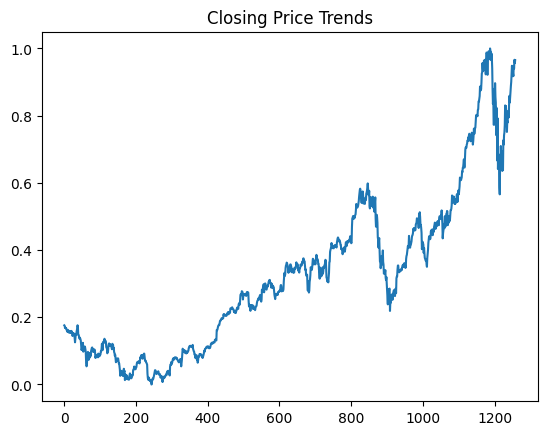

In [124]:
import matplotlib.pyplot as plt  # Closing prices trend over the years
plt.plot(df1)
plt.title('Closing Price Trends')
plt.show()

In [79]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [80]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [81]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [82]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [83]:
training_size,test_size

(817, 441)

In [84]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [85]:
import numpy
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99 100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [86]:
# Reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [87]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [88]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [89]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [90]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [91]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
12/12 [==============================] - 10s 291ms/step - loss: 0.0175 - val_loss: 0.0519
Epoch 2/30
12/12 [==============================] - 2s 176ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 3/30
12/12 [==============================] - 2s 176ms/step - loss: 0.0010 - val_loss: 0.0094
Epoch 4/30
12/12 [==============================] - 3s 241ms/step - loss: 7.3978e-04 - val_loss: 0.0043
Epoch 5/30
12/12 [==============================] - 3s 223ms/step - loss: 6.3737e-04 - val_loss: 0.0038
Epoch 6/30
12/12 [==============================] - 2s 172ms/step - loss: 6.0652e-04 - val_loss: 0.0039
Epoch 7/30
12/12 [==============================] - 2s 173ms/step - loss: 6.2411e-04 - val_loss: 0.0039
Epoch 8/30
12/12 [==============================] - 2s 173ms/step - loss: 6.0980e-04 - val_loss: 0.0042
Epoch 9/30
12/12 [==============================] - 2s 173ms/step - loss: 6.4460e-04 - val_loss: 0.0043
Epoch 10/30
12/12 [==============================] - 3s 271ms/step - loss: 

In [95]:
import tensorflow as tf

In [96]:
# Prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 35ms/step


In [97]:
# Transforming data back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [98]:
# Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.73066057818195

In [99]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

231.99685071943793

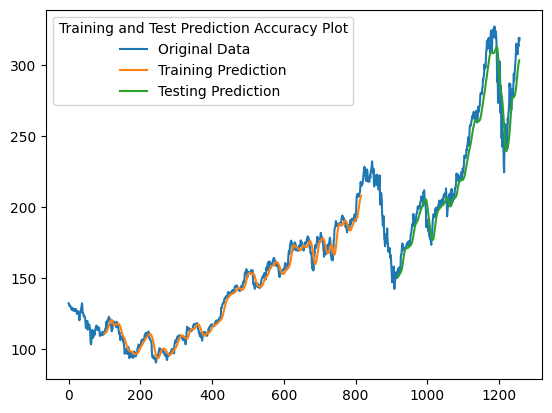

In [120]:
# Plotting
# shifting train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plotting baseline and predictions
plt.plot(scaler.inverse_transform(df1) , label = "Original Data")
plt.plot(trainPredictPlot , label = "Training Prediction")
plt.plot(testPredictPlot , label = "Testing Prediction")
plt.legend(title = 'Training and Test Prediction Accuracy Plot')
plt.show()

In [101]:
len(test_data)

441

In [102]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [105]:
# Demonstration for prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9094643]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [106]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [107]:
import matplotlib.pyplot as plt

In [108]:
len(df1)

1258

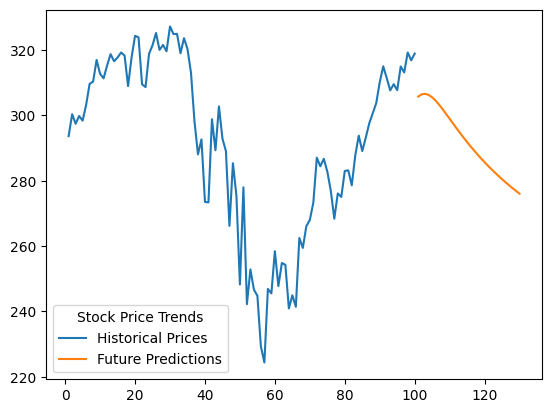

In [119]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]) , label ="Historical Prices")
plt.plot(day_pred,scaler.inverse_transform(lst_output) , label ="Future Predictions")
plt.legend(title='Stock Price Trends')
plt.show()

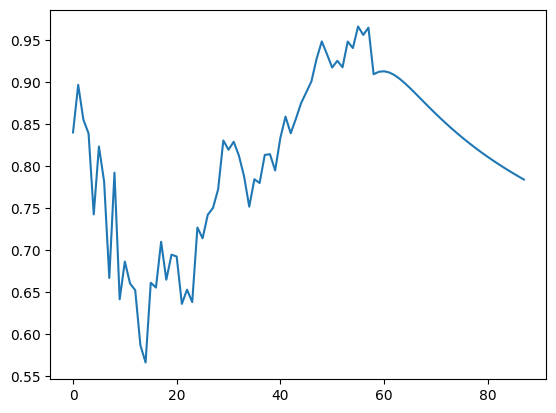

In [110]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [111]:
df3=scaler.inverse_transform(df3).tolist()

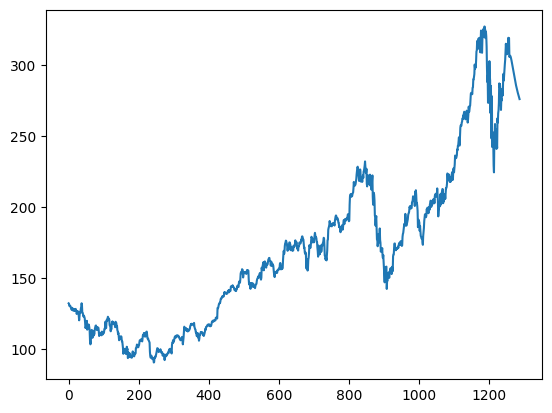

In [112]:
plt.plot(df3)